<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 5: Practical - Lasso & Ridge Regression <br> <br>
<font color=686880 size=4>
    TAs: Alireza Dehghanpour - Arman Malekzadeh - Ali Salesi
    
____

### Full Name : Mohammad Javad Maheronnaghsh
### Student Number : 99105691
### Colab Link: https://colab.research.google.com/drive/1Fw00sh3S4YZTDS0IuBX7FTIwu4SauKEb?usp=sharing
___

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

In this assignment you have to predict **life expectancy**.

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Data Exploration (20 points)

In [51]:
!wget -O /content/dataset.csv "https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1"

--2023-05-16 13:35:50--  https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2kz21qjt40pjy43/train.csv [following]
--2023-05-16 13:35:50--  https://www.dropbox.com/s/dl/2kz21qjt40pjy43/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8e0d782e8ad63197e46800e984.dl.dropboxusercontent.com/cd/0/get/B8JpCiijVtxmvVsmZBLD2Ti3ZFDZoreJObIibZdHHA0IUIKAYlrQ00BR4XTSz65TPrRFu_JWetmzs_bAMN5q6SOU5FYoDja6JaCANeG2QUQZaPJINEPk0kMcy34Iq6_XlD8yD72yRdIrycikiVEn_Ka8zA5Pu9mN3FfpjKTevKJYvS2xxS9C_nzBV48dkg78xQY/file?dl=1# [following]
--2023-05-16 13:35:50--  https://uc8e0d782e8ad63197e46800e984.dl.dropboxusercontent.com/cd/0/get/B8JpCiijVtxmvVsmZBLD2Ti3ZFDZoreJObIibZdHHA0IUIKAYlrQ00BR4XTSz65TPr

Load the dataset as a dataframe

In [52]:
df = pd.read_csv('/content/dataset.csv')

In [53]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Finland,2013,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,...,98.0,9.55,98.0,0.1,49638.771300,5438972.0,0.9,0.8,0.887,17.0
1,Japan,2015,Developed,83.7,55.0,2,NaN,0.000000,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
2,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,52.0,3.25,43.0,0.1,NaN,19239.0,6.3,6.1,0.575,9.0
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,Tunisia,2000,Developing,72.9,112.0,4,1.21,264.784220,94.0,47,...,97.0,5.40,97.0,0.1,2213.914880,9699197.0,6.6,6.5,0.646,12.8
2493,Myanmar,2001,Developing,62.5,239.0,72,0.38,1.917164,NaN,2519,...,77.0,1.80,73.0,0.4,138.924927,46627994.0,13.3,13.7,0.427,7.6
2494,Netherlands,2008,Developed,83.0,68.0,1,9.62,10873.405540,NaN,109,...,97.0,9.57,97.0,0.1,56928.824800,16445593.0,1.0,0.9,0.905,16.8
2495,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9


Plot "year" against "average life expectancy"

In [54]:
years = df['Year']
lifes = df['Life expectancy ']

In [55]:
len(years)

2497

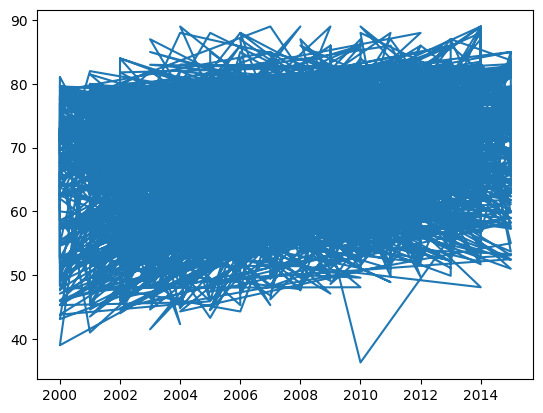

In [56]:
import matplotlib.pyplot as plt
plt.plot(years, lifes)
plt.show()

Compare the average life expectancy of "Developed" and "Developing" countries for each year 

In [57]:
df_deveploped = df[df['Status'] == 'Developed'].groupby('Year').mean()
df_developing = df[df['Status'] == 'Developing'].groupby('Year').mean()

<ipython-input-57-e711dbba471f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_deveploped = df[df['Status'] == 'Developed'].groupby('Year').mean()
<ipython-input-57-e711dbba471f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_developing = df[df['Status'] == 'Developing'].groupby('Year').mean()


In [58]:
df_developing.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015],
           dtype='int64', name='Year')

In [59]:
merged = pd.DataFrame(np.vstack([df_deveploped.index, df_deveploped['Life expectancy '], df_developing['Life expectancy ']]))

In [60]:
merged

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2000.000000,2001.000000,2002.000000,2003.000000,2004.000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000
1,76.891667,77.114286,77.710000,78.257692,78.452,78.792593,79.346667,79.252381,78.796552,79.581481,80.167857,79.821739,80.512000,80.376923,81.292593,80.175000
2,65.004959,65.048120,64.393496,65.617213,65.500,65.898450,67.167939,66.935878,67.365185,67.777206,67.404762,68.182443,68.823485,69.049606,69.442063,69.937984


Get the correlation between "Life expectancy" and "GDP"

In [61]:
gdps = df['GDP']
correlation = lifes.corr(gdps)

In [62]:
correlation

0.4652553879500644

Find out the feature having the strongest correlation with the "Life expectancy"<br>
Note: Do not display all of the correlation values. Your code should only print the result (the name of a column).

In [63]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [64]:
### TODO

# highest_value = -1
# highest_name = ''
# for col_name in df.columns:
#   # print(col_name)
#   correlation = lifes.corr(df[col_name])
#   if correlation > highest_value:
#     highest_value = correlation
#     highest_name = col_name
# print(highest_value)
# print(highest_name)

# Preprocessing (20 points)

Remove the rows containing NaN (or null) values

In [65]:
df_new = df.dropna()
# df_new = df_new.reset_index(drop=True)

In [66]:
df_new

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0
7,Colombia,2005,Developing,73.1,144.0,15,4.38,531.980818,93.0,0,...,93.0,5.82,93.0,0.1,3386.256000,43285634.0,2.4,2.1,0.658,11.1
11,Botswana,2012,Developing,63.4,3.0,2,0.01,12.834474,95.0,7,...,96.0,6.27,95.0,4.4,729.231453,289315.0,7.3,7.0,0.687,12.5
12,Mexico,2014,Developing,76.6,122.0,31,5.26,168.173753,84.0,3,...,87.0,6.30,87.0,0.1,1452.277660,1242216.0,1.6,1.5,0.754,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,Mauritius,2009,Developing,72.8,166.0,0,2.83,624.236183,99.0,15,...,99.0,4.97,99.0,0.1,7318.126410,1247429.0,7.3,7.3,0.734,13.8
2485,Mali,2009,Developing,56.0,276.0,55,0.59,84.634389,71.0,2939,...,77.0,6.85,73.0,1.6,697.153124,1466597.0,9.0,8.8,0.385,7.1
2488,Turkmenistan,2008,Developing,64.5,235.0,6,2.40,34.239794,96.0,0,...,96.0,1.93,96.0,0.1,394.467675,4935762.0,3.2,3.3,0.000,10.5
2490,Angola,2007,Developing,48.2,375.0,87,6.35,184.821345,73.0,1014,...,75.0,3.38,73.0,2.6,2878.837144,2997687.0,9.6,9.6,0.454,7.7


Convert categorical columns into their one-hot encoded versions

In [67]:
for column in df_new.columns:
  type_ = df_new[column].dtype
  if type_ == 'object':
    one_hotted = pd.get_dummies(df_new[column])
    print(len(one_hotted.columns))
    df_new = df_new.drop(column,axis = 1)
    df_new = df_new.join(one_hotted)

133
2


In [68]:
len(one_hotted.columns)

2

In [69]:
df_new

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Turkmenistan,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Zambia,Zimbabwe,Developed,Developing
3,2010,72.8,18.0,0,9.80,1109.969508,91.0,0,58.9,0,...,0,0,0,0,0,0,0,0,1,0
4,2013,67.1,192.0,0,0.01,200.660099,97.0,0,29.3,0,...,0,0,0,0,0,0,0,0,0,1
7,2005,73.1,144.0,15,4.38,531.980818,93.0,0,5.5,18,...,0,0,0,0,0,0,0,0,0,1
11,2012,63.4,3.0,2,0.01,12.834474,95.0,7,36.2,3,...,0,0,0,0,0,0,0,0,0,1
12,2014,76.6,122.0,31,5.26,168.173753,84.0,3,62.8,36,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2481,2009,72.8,166.0,0,2.83,624.236183,99.0,15,3.2,0,...,0,0,0,0,0,0,0,0,0,1
2485,2009,56.0,276.0,55,0.59,84.634389,71.0,2939,2.2,93,...,0,0,0,0,0,0,0,0,0,1
2488,2008,64.5,235.0,6,2.40,34.239794,96.0,0,42.7,8,...,1,0,0,0,0,0,0,0,0,1
2490,2007,48.2,375.0,87,6.35,184.821345,73.0,1014,18.8,138,...,0,0,0,0,0,0,0,0,0,1


Convert the dataframe into two numpy arrays (called `x` and `y`).<br>
To make the first array, remove the "Life expectancy" column, and convert the remaining dataframe to a numpy array.<br>
Then, use the removed column to make another numpy array (`y`).

In [70]:
y = df_new['Life expectancy ']
x = df_new.drop('Life expectancy ', axis = 1)

In [71]:
x = x.to_numpy()
y = y.to_numpy()

Normalize the data

In [72]:
# from sklearn.preprocessing import normalize
# x_ = normalize(x)
x_ = x/np.linalg.norm(x) 
y_ = y/np.linalg.norm(y) 


In [73]:
x_.shape

(1415, 154)

# Model Training

Split the data to training (80%) and testing (20%) parts (5 points)

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=42)

In [75]:
x_train.size/x_test.size

4.0

# Common Regression Class

This is a regression class and you do not need to change its code. You have to fully understand it and then create new classes for rigde and lasso regression which inherit from this class.
For initialization you have to specify learning rate, number of iteration, and a regularization object.

In [76]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        
        self.N = None # number of samples
        self.n = None # number of features
        self.w = None # initial weights
        self.regularization = regularization # will be the l1/l2 regularization class according to the regression model
        self.lr = learning_rate
        self.it = iteration

    def loss_function(self, y, y_pred):
        return (1 / (2*self.N)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    def hypothesis(self, weights, X):
        return np.dot(X, weights)

    def train(self, X, y):
        # Target value should be in the shape of (n, 1) not (n, ).

        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)

        self.N = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n , 1))

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, X)
            cost = self.loss_function(y, y_pred)
            dw = (1/self.N) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The loss function for the iteration {}----->{} :)".format(it, cost))
    
    def predict(self, test_X):
        # Insert constant ones for bias weights.
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred

# Regularization Classes (20 points)

You have to implement l2/l1 regularization.

In [77]:
class l1_regularization:
    """Regularization used for Lasso Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be returned when we call this class."
        ## TO DO
        return self.lamda * np.abs(weights)

        
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        ## TO DO
        return self.lamda * np.sign(weights)
        


class l2_regularization:
    """Regularization used for Ridge Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be retuned when we call this class."
        ## TO DO
        return self.lamda * np.sum(weights ** 2) / 2
    
    def derivation(self, weights):
        "Derivation of the regulariozation function."
        ## TO DO
        return self.lamda * weights

# Lasso Regression from scratch (5 points)

Train a lasso regression model using your own code and the following class.

In [78]:
class LassoRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

In [ ]:
lasso_own = LassoRegression(0.1, 0.1, 1000)
lasso_own.train(x_train, y_train.reshape(len(y_train), 1))

# Lasso Regression using skicit-learn (5 points)

Use `sklearn` to train a Lasso Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [80]:
from sklearn import linear_model
lasso_sklearn = linear_model.Lasso(alpha=0.1)
lasso_sklearn.fit(x_train, y_train)

# Grid Search ??

Lasso(alpha=0.1)

# Ridge Regression From scratch (5 points)

Train a ridge regression model using your own code and the following class.

In [81]:
class RidgeRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

In [82]:
ridge_own = RidgeRegression(0.1, 0.1, 100)
ridge_own.train(x_train, y_train.reshape(len(y_train), 1))

The loss function for the iteration 10----->7.564369251875894e-05 :)
The loss function for the iteration 20----->4.067438680964723e-05 :)
The loss function for the iteration 30----->3.727457444562176e-05 :)
The loss function for the iteration 40----->3.694403156599816e-05 :)
The loss function for the iteration 50----->3.6911891855070656e-05 :)
The loss function for the iteration 60----->3.6908764315492515e-05 :)
The loss function for the iteration 70----->3.6908457934688636e-05 :)
The loss function for the iteration 80----->3.690842625870674e-05 :)
The loss function for the iteration 90----->3.690842163678414e-05 :)
The loss function for the iteration 100----->3.690841992808888e-05 :)


# Ridge Regression using scikit-learn (5 points)

Use `sklearn` to train a Ridge Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [83]:
from sklearn import linear_model
ridge_sklearn = linear_model.Ridge(alpha=0.1)
ridge_sklearn.fit(x_train, y_train)

# Grid Search ??

Ridge(alpha=0.1)

# Evaluation (15 points)

For each model (the 2 models trained using `sklearn` and the ones based on your code), predict the output for the testing samples.

In [84]:
preds_lasso_sklearn = lasso_sklearn.predict(x_test)
preds_ridge_sklearn = ridge_sklearn.predict(x_test)
preds_lasso_own = lasso_own.predict(x_test)
preds_ridge_own = ridge_own.predict(x_test)

preds_lasso_own = preds_lasso_own.reshape((len(preds_lasso_own), ))
preds_ridge_own = preds_ridge_own.reshape((len(preds_ridge_own), ))

In [85]:
preds_ridge_sklearn.shape

(283,)

In [86]:
preds_lasso_own.shape

(283,)

Measure the performance of the models based on "mean squared error" and the "coefficient of determination" of the prediction.

In [87]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


print('************')
print('Lasso Sklearn')
mse_lasso_sklearn = mean_squared_error(y_test, preds_lasso_sklearn)
r2_lasso_sklearn = r2_score(y_test, preds_lasso_sklearn)
print("MSE:", mse_lasso_sklearn)
print("R2:", r2_lasso_sklearn)
# print("Accuracy:", accuracy_score(y_test.flatten(), preds_lasso_sklearn.flatten()))

print('************')
print('Ridge Sklearn')
mse_ridge_sklearn = mean_squared_error(y_test, preds_ridge_sklearn)
r2_ridge_sklearn = r2_score(y_test, preds_ridge_sklearn)
print("MSE:", mse_ridge_sklearn)
print("R2:", r2_ridge_sklearn)
# print("Accuracy:", accuracy_score(y_test, preds_ridge_sklearn))


print('************')
print('Lasso Own')
mse_lasso_own = mean_squared_error(y_test, preds_lasso_own)
r2_lasso_own = r2_score(y_test, preds_lasso_own)
print("MSE:", mse_lasso_own)
print("R2:", r2_lasso_own)
# print("Accuracy:", accuracy_score(y_test.flatten(), preds_lasso_own.flatten()))


print('************')
print('Ridge Own')
mse_ridge_own = mean_squared_error(y_test, preds_ridge_own)
r2_ridge_own = r2_score(y_test, preds_ridge_own)
print("MSE:", mse_ridge_own)
print("R2:", r2_ridge_own)
# print("Accuracy:", accuracy_score(y_test, preds_ridge_own))

************
Lasso Sklearn
MSE: 1.1356090630445429e-05
R2: -0.0020254049144554642
************
Ridge Sklearn
MSE: 1.1365181236810512e-05
R2: -0.0028275311760643795
************
Lasso Own
MSE: 0.00023693406982849642
R2: -19.906310541536843
************
Ridge Own
MSE: 1.7821689433810617e-05
R2: -0.5725293282969606


# Kaggle

Competition Link: https://www.kaggle.com/t/adbf95666e7c4f41a6be1129a9e4415c

In [88]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !touch "/content/gdrive/My Drive/assignment4-test-data.csv"


In [89]:
# test_file_df = pd.read_csv('/content/gdrive/My Drive/assignment5-test-data.csv')


In [90]:

# one_hotted = pd.get_dummies(test_file_df['Country'])

# len(one_hotted.columns)
# for col in one_hotted.columns:
#   if col not in df_new.columns:
#     print(col)

# test_file_df_new = test_file_df
# for column in test_file_df_new.columns:
#   type_ = test_file_df_new[column].dtype
#   if type_ == 'object':
#     one_hotted = pd.get_dummies(test_file_df_new[column])
#     print(len(one_hotted.columns))
#     test_file_df_new = test_file_df_new.drop(column,axis = 1)
#     test_file_df_new = test_file_df_new.join(one_hotted)
# test_file_df_new = test_file_df_new.reindex_like(df_new)
